### Pet Classifier

In [2]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

from fastai.vision import *
from fastai.metrics import error_rate

In [5]:
path = untar_data(URLs.PETS)
path.ls()

[PosixPath('/home/ubuntu/.fastai/data/oxford-iiit-pet/images'),
 PosixPath('/home/ubuntu/.fastai/data/oxford-iiit-pet/annotations')]

In [6]:
anno_dir = path / 'annotations'
img_dir = path / 'images'

In [8]:
img_files = get_image_files(img_dir)
img_files[:3]

[PosixPath('/home/ubuntu/.fastai/data/oxford-iiit-pet/images/japanese_chin_160.jpg'),
 PosixPath('/home/ubuntu/.fastai/data/oxford-iiit-pet/images/american_pit_bull_terrier_204.jpg'),
 PosixPath('/home/ubuntu/.fastai/data/oxford-iiit-pet/images/japanese_chin_197.jpg')]

In [9]:
ImageDataBunch.from_name_re?

Signature:
ImageDataBunch.from_name_re(
    path: Union[pathlib.Path, str],
    fnames: Collection[pathlib.Path],
    pat: str,
    valid_pct: float = 0.2,
    **kwargs,
)
Docstring: Create from list of `fnames` in `path` with re expression `pat`.
File:      ~/.pyenv/versions/3.8.1/envs/py38/lib/python3.8/site-packages/fastai/vision/data.py
Type:      method


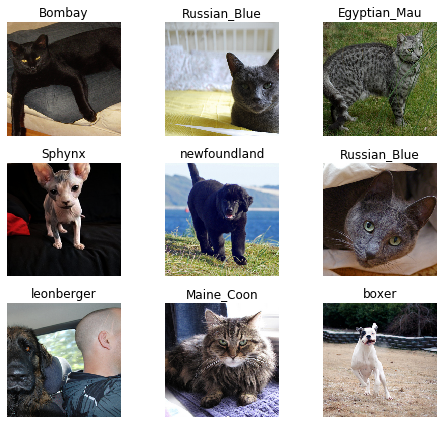

In [13]:
np.random.seed(2)  # why are we doing this?
pat = r'/([^/]+)_\d+.jpg$'  # file name pattern, capture group is label

data = (ImageDataBunch
            .from_name_re(img_dir, img_files, pat, ds_tfms=get_transforms(), size=224, bs=64)
            .normalize(imagenet_stats))

data.show_batch(rows=3, figsize=(7,6))

In [15]:
data.classes  # this is the set of labels / classes

['Abyssinian',
 'Bengal',
 'Birman',
 'Bombay',
 'British_Shorthair',
 'Egyptian_Mau',
 'Maine_Coon',
 'Persian',
 'Ragdoll',
 'Russian_Blue',
 'Siamese',
 'Sphynx',
 'american_bulldog',
 'american_pit_bull_terrier',
 'basset_hound',
 'beagle',
 'boxer',
 'chihuahua',
 'english_cocker_spaniel',
 'english_setter',
 'german_shorthaired',
 'great_pyrenees',
 'havanese',
 'japanese_chin',
 'keeshond',
 'leonberger',
 'miniature_pinscher',
 'newfoundland',
 'pomeranian',
 'pug',
 'saint_bernard',
 'samoyed',
 'scottish_terrier',
 'shiba_inu',
 'staffordshire_bull_terrier',
 'wheaten_terrier',
 'yorkshire_terrier']

In [16]:
data.c  # this is number of classes

37

In [17]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.386546,0.259450,0.084574,00:25
1,0.629278,0.253876,0.086604,00:25
2,0.413758,0.182922,0.057510,00:25
3,0.266730,0.166553,0.054804,00:26


#### Interpretation

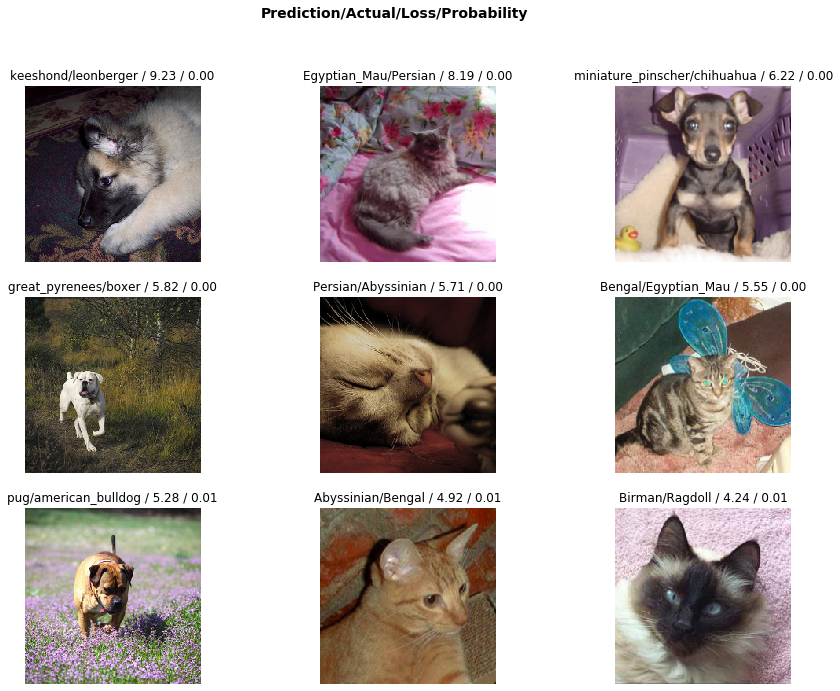

In [19]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_top_losses(9, figsize=(15,11))

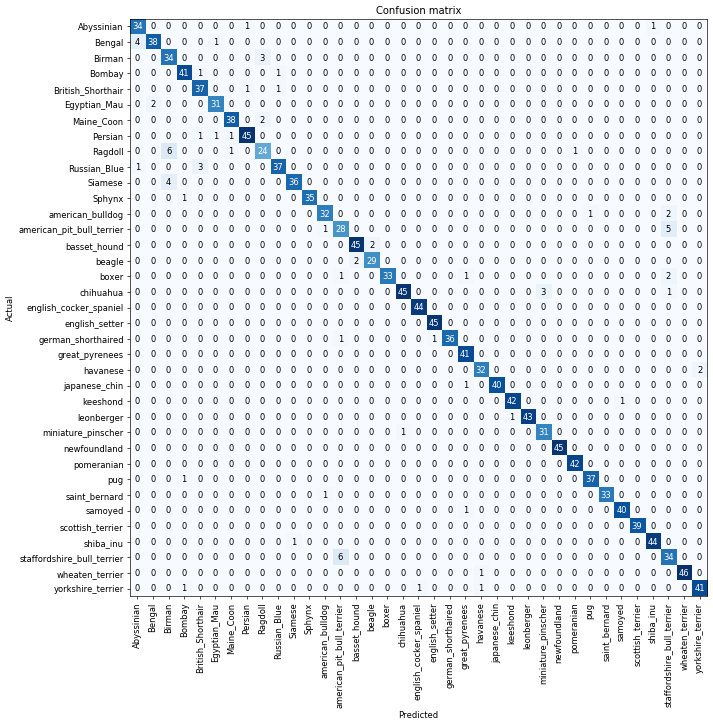

In [20]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [21]:
interp.most_confused(min_val=2)

[('Ragdoll', 'Birman', 6),
 ('staffordshire_bull_terrier', 'american_pit_bull_terrier', 6),
 ('american_pit_bull_terrier', 'staffordshire_bull_terrier', 5),
 ('Bengal', 'Abyssinian', 4),
 ('Siamese', 'Birman', 4),
 ('Birman', 'Ragdoll', 3),
 ('Russian_Blue', 'British_Shorthair', 3),
 ('chihuahua', 'miniature_pinscher', 3),
 ('Egyptian_Mau', 'Bengal', 2),
 ('Maine_Coon', 'Ragdoll', 2),
 ('american_bulldog', 'staffordshire_bull_terrier', 2),
 ('basset_hound', 'beagle', 2),
 ('beagle', 'basset_hound', 2),
 ('boxer', 'staffordshire_bull_terrier', 2),
 ('havanese', 'yorkshire_terrier', 2)]

In [22]:
learn.lr_find()

epoch,train_loss,valid_loss,error_rate,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


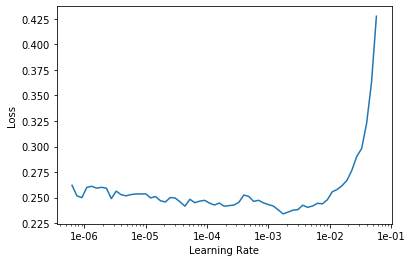

In [23]:
learn.recorder.plot()

Using the plot above, we now fit_one_cycle with specific learning rate we infer from the plot above

In [24]:
learn.unfreeze()

In [25]:
learn.fit_one_cycle(2, max_lr=slice(1e-6, 1e-4))  # well before it spikes

epoch,train_loss,valid_loss,error_rate,time
0,0.242017,0.166261,0.058863,00:25
1,0.212394,0.166340,0.054127,00:25


In [26]:
ClassificationInterpretation.from_learner(learn).most_confused(min_val=2)

[('Ragdoll', 'Birman', 6),
 ('staffordshire_bull_terrier', 'american_pit_bull_terrier', 5),
 ('Siamese', 'Birman', 4),
 ('Birman', 'Ragdoll', 3),
 ('Russian_Blue', 'British_Shorthair', 3),
 ('american_pit_bull_terrier', 'staffordshire_bull_terrier', 3),
 ('chihuahua', 'miniature_pinscher', 3),
 ('Bengal', 'Abyssinian', 2),
 ('Egyptian_Mau', 'Bengal', 2),
 ('Maine_Coon', 'Bengal', 2),
 ('Ragdoll', 'Maine_Coon', 2),
 ('basset_hound', 'beagle', 2),
 ('beagle', 'basset_hound', 2),
 ('boxer', 'staffordshire_bull_terrier', 2),
 ('german_shorthaired', 'american_pit_bull_terrier', 2)]

### Other Data Formats

In [28]:
path = untar_data(URLs.MNIST_SAMPLE)
path.ls()

[PosixPath('/home/ubuntu/.fastai/data/mnist_sample/valid'),
 PosixPath('/home/ubuntu/.fastai/data/mnist_sample/labels.csv'),
 PosixPath('/home/ubuntu/.fastai/data/mnist_sample/train')]

In [34]:
ImageDataBunch.from_folder?

Signature:
ImageDataBunch.from_folder(
    path: Union[pathlib.Path, str],
    train: Union[pathlib.Path, str] = 'train',
    valid: Union[pathlib.Path, str] = 'valid',
    test: Union[pathlib.Path, str, NoneType] = None,
    valid_pct=None,
    seed: int = None,
    classes: Collection = None,
    **kwargs: Any,
) -> 'ImageDataBunch'
Docstring: Create from imagenet style dataset in `path` with `train`,`valid`,`test` subfolders (or provide `valid_pct`).
File:      ~/.pyenv/versions/3.8.1/envs/py38/lib/python3.8/site-packages/fastai/vision/data.py
Type:      method


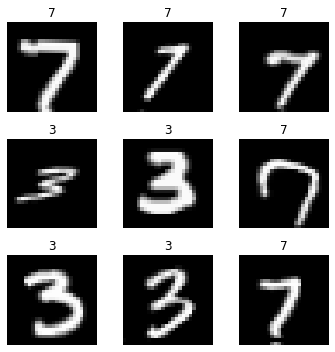

In [35]:
# since MNIST_SAMPLE is an imagenet-style dataset, we can load using the from_folder factory method
data = ImageDataBunch.from_folder(path, ds_tfms=get_transforms(do_flip=False), size=26)
data.show_batch(rows=3, figsize=(5,5))

In [36]:
pd.read_csv(path / 'labels.csv').head()

,name,label
0,train/3/7463.png,0
1,train/3/21102.png,0
2,train/3/31559.png,0
3,train/3/46882.png,0
4,train/3/26209.png,0


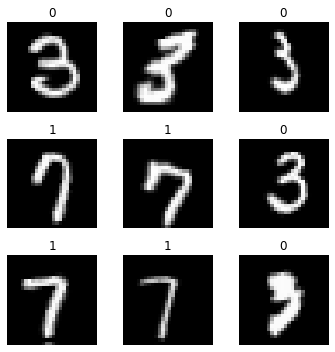

In [37]:
# we can use a csv file (like the above) to create an ImageDataBunch too
data = ImageDataBunch.from_csv(path, ds_tfms=get_transforms(do_flip=False), size=26)
data.show_batch(rows=3, figsize=(5,5))

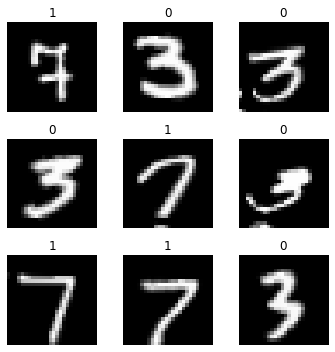

In [39]:
# a CSV read in to a pandas data frame can also be used
df = pd.read_csv(path / 'labels.csv')
data = ImageDataBunch.from_df(path, df, ds_tfms=get_transforms(do_flip=False), size=26)
data.show_batch(rows=3, figsize=(5,5))

Other factory methods

In [41]:
ImageDataBunch.from_name_func?

Signature:
ImageDataBunch.from_name_func(
    path: Union[pathlib.Path, str],
    fnames: Collection[pathlib.Path],
    label_func: Callable,
    valid_pct: float = 0.2,
    seed: int = None,
    **kwargs,
)
Docstring: Create from list of `fnames` in `path` with `label_func`.
File:      ~/.pyenv/versions/3.8.1/envs/py38/lib/python3.8/site-packages/fastai/vision/data.py
Type:      method


In [42]:
ImageDataBunch.from_lists?

Signature:
ImageDataBunch.from_lists(
    path: Union[pathlib.Path, str],
    fnames: Collection[pathlib.Path],
    labels: Collection[str],
    valid_pct: float = 0.2,
    seed: int = None,
    item_cls: Callable = None,
    **kwargs,
)
Docstring: Create from list of `fnames` in `path`.
File:      ~/.pyenv/versions/3.8.1/envs/py38/lib/python3.8/site-packages/fastai/vision/data.py
Type:      method
